In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
pd.set_option("display.max_columns",None)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: >

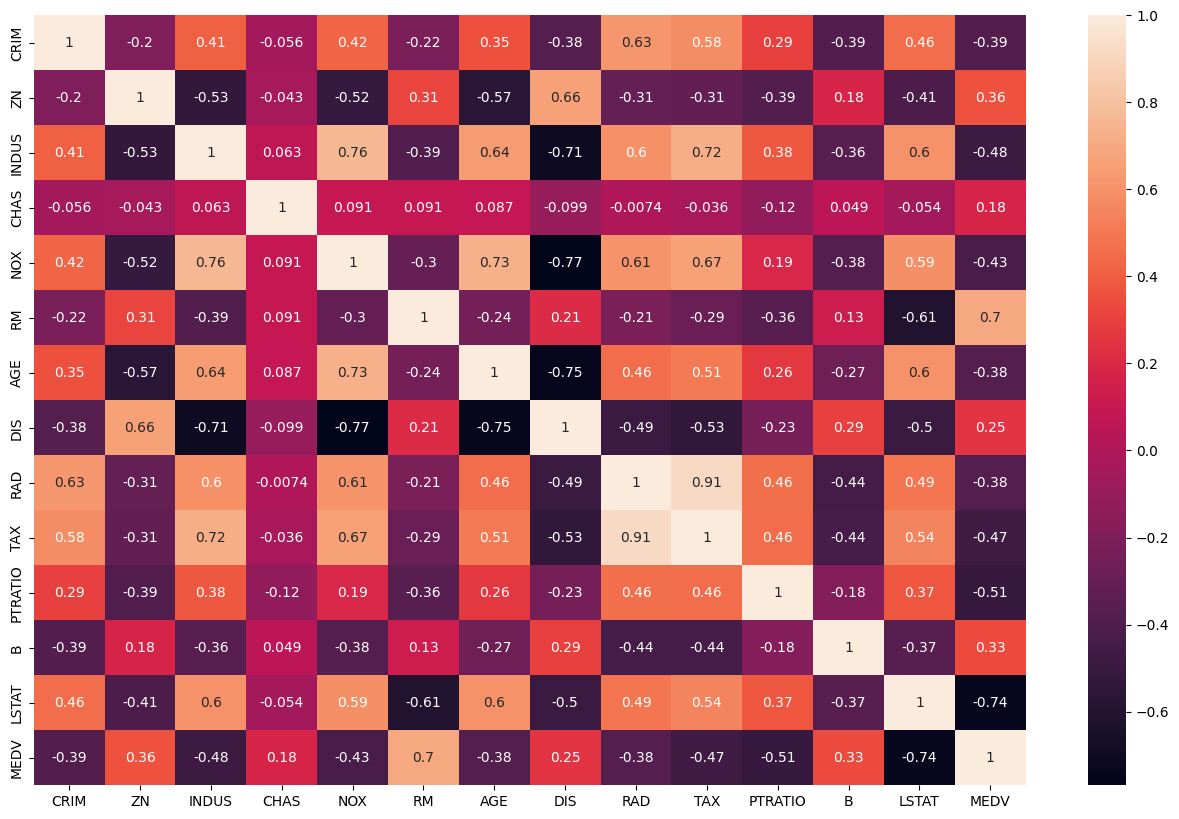

In [44]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot = True)

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.shape

(506, 14)

In [9]:
X = df.drop(columns=["MEDV"], axis = 1)
Y = df["MEDV"]

In [10]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
St = StandardScaler()
X_train_scale = St.fit_transform(X_train)
X_test_scale = St.transform(X_test)

In [11]:
LR = LinearRegression()
LR.fit(X_train_scale, Y_train)

LinearRegression()

In [12]:
LR.score(X_train_scale,Y_train)

0.7508856358979673

In [13]:
LR.score(X_test_scale,Y_test)

0.668759493535632

In [14]:
Y_pred = LR.predict(X_test_scale)

In [15]:
r2_score(Y_test, Y_pred)

0.668759493535632

In [16]:
mean_absolute_error(Y_test, Y_pred)

3.1890919658878483

In [17]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

4.928602182665336

In [18]:
intercept = LR.intercept_
coeffiecient = LR.coef_

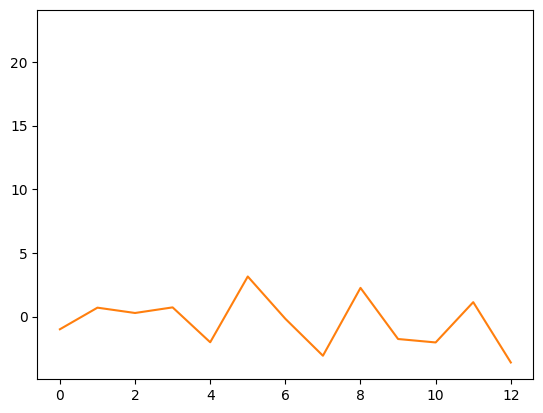

In [19]:
plt.plot(intercept)
plt.plot(coeffiecient)
plt.show()

In [20]:
parameters = {'alpha':[1, 10]}
model = Ridge()
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(model, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train_scale, Y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']})

In [21]:
RY_pred = Ridge_GS.predict(X_test_scale)

In [22]:
np.sqrt(mean_squared_error(Y_test, RY_pred))

4.930811680696354

In [23]:
mean_absolute_error(Y_test, RY_pred)

3.1857238072445986

In [24]:
r2_score(Y_test, RY_pred)

0.6684624359643561

In [25]:
poly =PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_scale)
X_test_poly = poly.transform(X_test_scale)

In [26]:
model = LinearRegression()
model.fit(X_train_poly, Y_train)

LinearRegression()

In [27]:
Y_pred_poly = model.predict(X_test_poly)

In [28]:
r2_score(Y_test, Y_pred_poly)*100

80.54509245635728

In [29]:
mean_absolute_error(Y_test, Y_pred_poly)

2.5762369193282773

In [30]:
np.sqrt(mean_squared_error(Y_test, Y_pred_poly))

3.7771708608555508

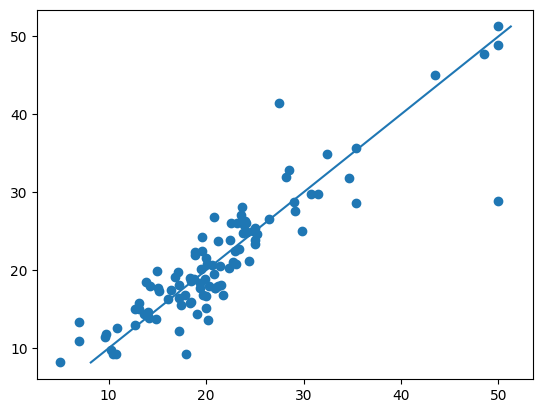

In [31]:
plt.scatter(Y_test, Y_pred_poly)
plt.plot([Y_pred_poly.min(), Y_pred_poly.max()],[Y_pred_poly.min(), Y_pred_poly.max()])

In [47]:
print("Model intercept: ", model.intercept_)
print("model weights: ", model.coef_)

Model intercept:  -248446417229.2227
model weights:  [-4.75471725e-12  3.33154101e+00  2.96166423e+00  1.15862756e+01
 -8.24316901e+11 -1.64627918e+00  3.72432836e+00 -1.67625784e+00
 -1.26321296e+00  6.85744807e+00 -1.43144150e+01  2.15446242e+00
  1.38624434e+00 -3.09122527e+00  3.15734478e-02  1.61190934e+01
  3.42336193e+01  5.89119643e+00 -2.11881690e+00  1.18527794e+00
 -5.40610582e-01 -1.40835760e+00  2.37787490e+01 -5.24454457e+01
  1.28454714e+01 -3.40899635e-01  2.08875053e+00 -2.35012224e-01
 -7.82588863e-01 -2.41409190e-01 -3.71488440e+00 -5.76766670e-02
  7.97079587e-01 -1.03604126e+00 -3.35992432e+00  3.26131630e+00
 -1.56661987e-01  1.63986206e-01 -1.63047791e+00  2.54983521e+00
 -4.09288406e-02 -1.70310974e-01  1.64403534e+00  8.44436646e-01
  2.23680210e+00 -1.94799805e+00  2.36846924e-01 -2.46475220e-01
  1.97792053e+00 -9.04388428e-01  2.48446417e+11 -1.11470795e+00
 -9.62638855e-01 -2.49847412e-01 -4.98552322e-01  3.06694031e-01
 -3.30650330e-01 -4.80644226e-01  2.7

## L2 regularization

In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.7).fit(X_train_poly, Y_train)

In [51]:
print("Ridge on train data:", ridge.score(X_train_poly, Y_train))
print("Ridge on test data:", ridge.score(X_test_poly, Y_test))

Ridge on train data: 0.9384979950676613
Ridge on train data: 0.8154784443132319


In [74]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.4).fit(X_train_poly, Y_train)

In [75]:
print("Lasso on train data:", lasso.score(X_train_poly, Y_train))
print("Lasso on test data:", lasso.score(X_test_poly, Y_test))

Lasso on train data: 0.8404875838367607
Lasso on train data: 0.7828469486593268


In [76]:
Y_pred_lasso = lasso.predict(X_test_poly)
print("MAE: ",mean_absolute_error(Y_test, Y_pred_lasso))
print("MSE: ",np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)))
print("r2_score: ", r2_score(Y_test, Y_pred_lasso))

MAE:  2.5251993014949075
MSE:  3.990570733569248
r2_score:  0.7828469486593268


In [81]:
print("lasso intercept: ",lasso.intercept_)
print("Lasso coefficients: ", lasso.coef_)

lasso intercept:  21.966954098575695
Lasso coefficients:  [ 0.         -0.          0.         -0.          0.         -0.
  2.89324471 -0.         -0.         -0.         -0.         -0.93391332
  0.         -4.02809772 -0.08995931  0.         -0.          0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.          0.
  0.          0.         -0.         -0.         -0.          0.
  0.         -0.         -0.          0.          0.         -0.
 -0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.19184981 -0.03894322 -0.          0.
 -0.          0.18109747  0.          0.          0.         -0.
 -0.178886   -0.13994196 -0.          0.         -0.         -0.
 -0.          0.         -0.          0.65947621 -0.          0.
 -0.90509878 -0.14913439 -0.64335621  0.         -0.          0.
  0.          0.          0.         -0.         -0.         -0.
 -0.          0.        

In [77]:
Y_pred_ridge = ridge.predict(X_test_poly)
print("MAE: ",mean_absolute_error(Y_test, Y_pred_ridge))
print("MSE: ",np.sqrt(mean_squared_error(`Y_test, Y_pred_ridge)))
print("r2_score: ", r2_score(Y_test, Y_pred_ridge))

MAE:  2.4245715049212033
MSE:  3.678540981576651
r2_score:  0.8154784443132319


In [83]:
print("Ridge intercept: ",ridge.intercept_)
print("Ridge coefficients: ", ridge.coef_)

Ridge intercept:  21.52983011775009
Ridge coefficients:  [ 0.          0.92197087 -0.62219235  1.63742601  0.12923176 -1.25624046
  3.67695965 -1.50126183 -1.78760852  0.21837404 -0.21709845 -1.29599448
  0.8210794  -3.148412    0.03873434 -0.17337379  1.02650717  5.2585565
 -1.89983528  1.20780228 -0.1891553  -0.36561254 -1.48865973 -0.23318271
  0.72591902 -0.26865242  1.96842241  0.10487139 -0.21017837 -0.06374375
 -1.2714808  -0.07942587  0.38974611 -0.90486267 -1.59013898  2.25277048
  0.03201365 -0.9935572  -1.41146581  1.47773208 -0.22778181  1.82098848
  1.57979783  0.56067636  1.9337877   0.62237406  0.47361115 -0.54764897
  0.60372633 -0.51784428  0.42877625 -1.06825267 -0.90799586 -0.09749704
 -0.52430043 -0.15142073  0.2502138  -0.32289928  0.19075564 -0.50727504
 -1.20799669 -0.6262959  -0.32514697  2.24020167 -0.52482793  1.68119993
 -2.06728073 -0.21658331  0.75244     0.53385692 -1.22991685 -0.21515012
 -1.10960773 -1.71280606 -0.92252102 -0.42314969 -0.07192612  0.0143

## L1 and L2 regularization or elasticsnet

In [78]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha = 0.4, l1_ratio=0.2).fit(X_train_poly, Y_train)

In [79]:
print("ElasticNet on train data:", elastic.score(X_train_poly, Y_train))
print("ElasticNet on test data:", elastic.score(X_test_poly, Y_test))

ElasticNet on train data: 0.8611975361640993
ElasticNet on test data: 0.7967596577922623


In [80]:
Y_pred_elastic = elastic.predict(X_test_poly)
print("MAE: ",mean_absolute_error(Y_test, Y_pred_elastic))
print("MSE: ",np.sqrt(mean_squared_error(Y_test, Y_pred_elastic)))
print("r2_score: ", r2_score(Y_test, Y_pred_elastic))

MAE:  2.2706679653563486
MSE:  3.8606195338173466
r2_score:  0.7967596577922623


In [84]:
print("Elastic intercept: ",elastic.intercept_)
print("Elastic coefficients: ", elastic.coef_)

Elastic intercept:  21.81590573378267
Elastic coefficients:  [ 0.         -0.06284541  0.         -0.26739659  0.         -0.41027941
  2.50482883 -0.46722084 -0.23401817  0.         -0.44173878 -0.88204424
  0.12855659 -2.21099726  0.00812302  0.         -0.          0.29768329
 -0.08311468  0.17638246  0.          0.17102732 -0.28198094 -0.
  0.         -0.07064594 -0.09136115  0.19248571 -0.          0.03047081
  0.          0.         -0.         -0.         -0.         -0.
  0.07447426 -0.          0.          0.2653493   0.10008155 -0.
 -0.10166379  0.2147549   0.13749922  0.          0.08378025 -0.03866708
 -0.         -0.26624757  0.30121838 -0.4798067  -0.30738862  0.11323971
 -0.08337348  0.25673162  0.4521341   0.06083359  0.         -0.35164394
 -0.31318019 -0.53925223  0.          0.28852132 -0.19458187 -0.
 -0.00944552 -0.          0.          0.70660036 -0.09163142  0.
 -0.62627591 -0.52384556 -0.73261073  0.         -0.23386379  0.22571274
 -0.          0.17648095  0.19